# Data Processing Of Phase Screens
Authors: Clovis Faure and Gauri Padalkar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget

In [2]:
def pli(image):
    '''Function to plot an image in the conventional format'''
    #plt.close()
    return plt.imshow(image.T,origin="lower")


### Simulating a Phase Screen

In [3]:

N=200
x = np.arange(N)-N//2
k2 = np.fft.fftshift(x[None,:]**2 + x[:,None]**2) + 1.0
#pli(np.fft.fft2(k2**(-11/12) * np.exp(2j*np.pi*np.random.rand(N,N))).real) # Phase

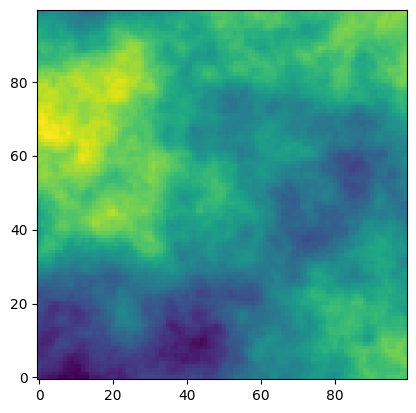

In [4]:
'''Taking a 100x100 crop of the 200x200 phase screen to get an unwrapped phase screen as we expect such an output from the optical bench'''
phase_img = np.fft.fft2(k2**(-11/12) * np.exp(2j*np.pi*np.random.rand(N,N))).real 
n = 100
phase = phase_img[0:n, 0:n] #- phase_img[1:n+1, 0:n] # Cropping to 100x100
pli(phase)

1.9232731563913796


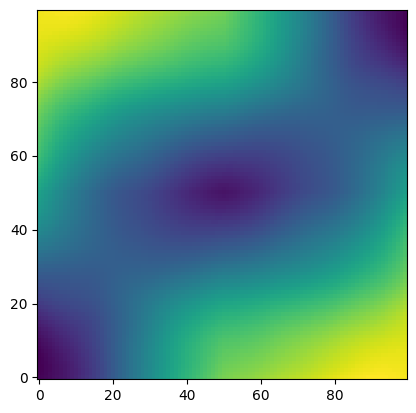

In [5]:
b = np.zeros((2*n,2*n))
b[0:n,0:n] = phase
auto = (np.fft.ifft2(np.abs(np.fft.fft2(b))**2)).real
auto = np.fft.fftshift(auto)
auto = auto[n//2:n//2+n, n//2:n//2+n]


support = np.zeros((2*n,2*n))
support[0:n,0:n] = 1
normalization = (np.fft.ifft2(np.abs(np.fft.fft2(support))**2)).real
normalization = np.fft.fftshift(normalization)
normalization = normalization[n//2:n//2+n, n//2:n//2+n]

auto_normalized = auto / normalization


Dphi = 2*(auto_normalized[n//2,n//2] - auto_normalized)

print(auto_normalized[n//2,n//2])
print
#Dphi = auto_normalized
pli(Dphi)


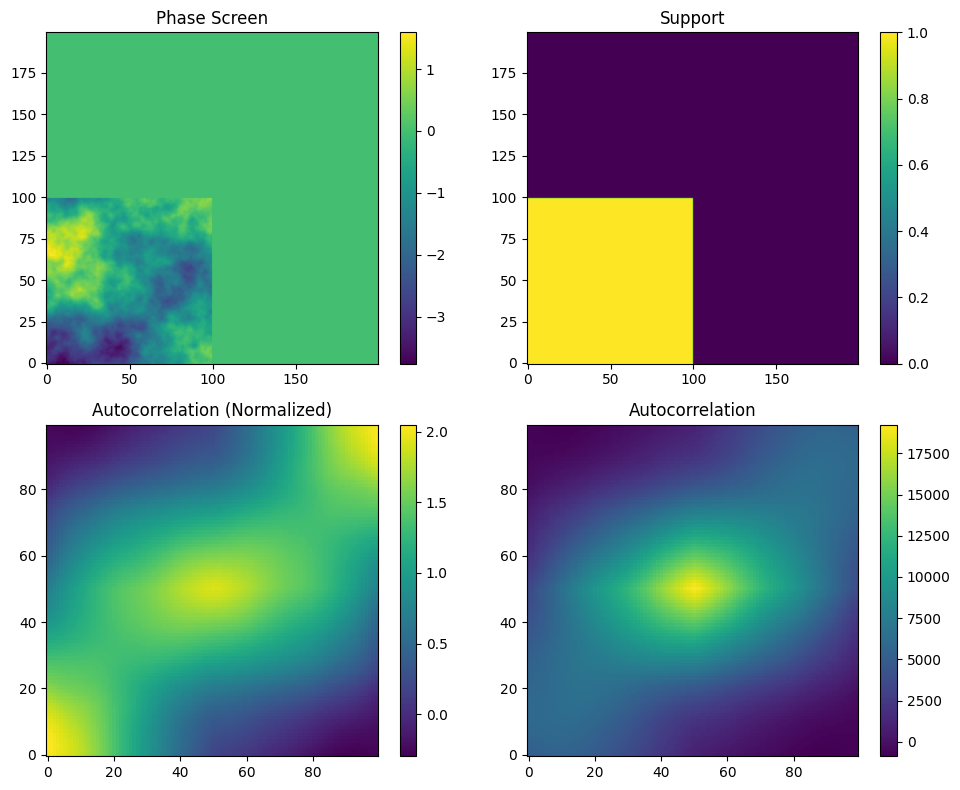

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


plt.subplot(2, 2, 1)
im1 = pli(b)
plt.title("Phase Screen")
plt.colorbar(im1)


plt.subplot(2, 2, 2)
im2 = pli(support)
plt.title("Support")
plt.colorbar(im2)


plt.subplot(2, 2, 3)
im3 = pli(auto_normalized)
plt.title("Autocorrelation (Normalized)")
plt.colorbar(im3)

plt.subplot(2, 2, 4)
im4 = pli(auto)
plt.title("Autocorrelation")
plt.colorbar(im4)

plt.tight_layout()
#plt.show()


In [7]:
tmp = np.arange(n) - n//2
X, Y = np.meshgrid(tmp, tmp, indexing='ij')
r = np.sqrt(X**2 + Y**2)
u = 5/r**(1/3)/3-5*X**2/(9*r**(7/3))

#plt.scatter(r.flatten(), Dphi.flatten(), s=1)
#plt.loglog()

/var/folders/bs/jpbbg6617vb24gzxpfnn6db80000gn/T/ipykernel_29350/1012637059.py:4: RuntimeWarning: divide by zero encountered in divide
  u = 5/r**(1/3)/3-5*X**2/(9*r**(7/3))
/var/folders/bs/jpbbg6617vb24gzxpfnn6db80000gn/T/ipykernel_29350/1012637059.py:4: RuntimeWarning: invalid value encountered in divide
  u = 5/r**(1/3)/3-5*X**2/(9*r**(7/3))


(50, 50) (50, 50)
0.006773395707413381


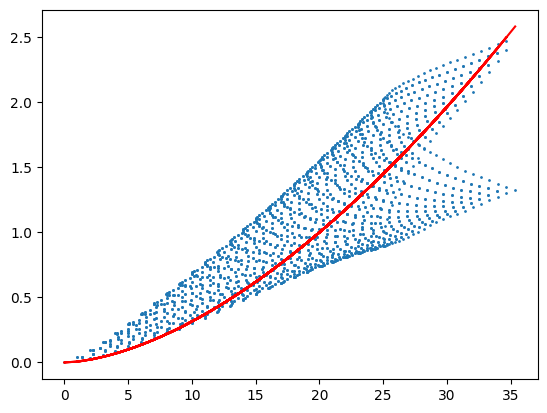

In [8]:
Dphi_crop = Dphi[(n//4):(3*n//4), (n//4):(3*n//4)]
#Dphi_crop = Dphi[(n//4):(3*n//4), (n//4):(3*n//4)]
r_crop = r[(n//4):(3*n//4), (n//4):(3*n//4)]
print(Dphi_crop.shape, r_crop.shape)
plt.scatter(r_crop, Dphi_crop, s=1)


k = np.sum(Dphi_crop * r_crop**(5/3)) / np.sum(r_crop**(2*(5/3)))
Dphi_fit = k * r_crop**(5/3)
plt.plot(r_crop, Dphi_fit, color='red')
print(k)


# Experimental Analysis

In [9]:
import astropy.io.fits as pf
import numpy as np

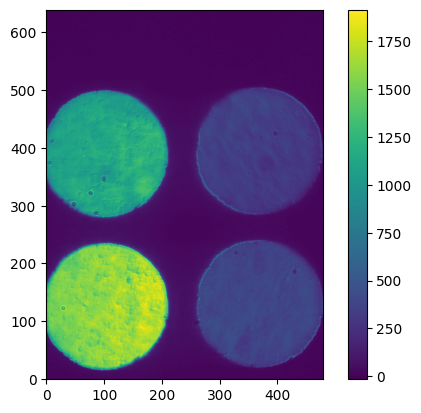

In [10]:
path = "/Users/gauripadalkar/Desktop/phase-screens/bench_data/"
f_list = ["bg_10000.fits", "no-phase_screen_10000.fits", "phase_screen_10000.fits"]

# Background
bg = pf.getdata(path + f_list[0])
bg = np.mean(bg, axis=0)
pli(bg)

# No Phase Screen
no_phase = pf.getdata(path + f_list[1]) 
no_phase = np.mean(no_phase, axis=0) - bg

plt.imshow(no_phase, origin='lower')
plt.colorbar()  



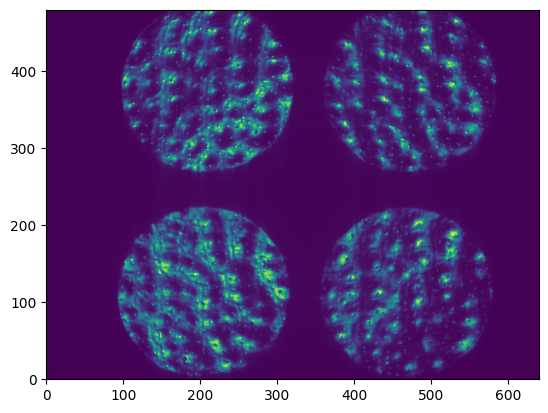

In [11]:
#%matplotlib widget

phase_screen= pf.getdata(path + f_list[2]) 
phase = np.mean(phase_screen, axis=0) - bg

pli(phase)

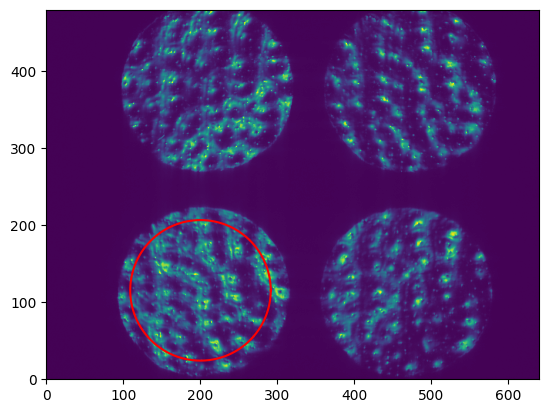

In [12]:
x = 315.4 - 93.8
y = 120.6 - 100.4

D = np.sqrt(x**2 + y**2)
r = D/2 - 20

def circle(x,y,R):
    t = np.linspace(0,2*np.pi,222)
    plt.plot(R*np.cos(t)+x, R*np.sin(t)+y, color='r')

circle (200,115,r)
pli(phase)



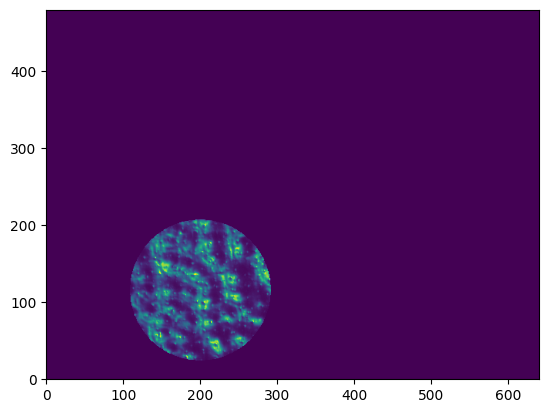

In [13]:
nx = 640
ny = 480 
x = np.arange(nx) -200
y = np.arange(ny) -115
xx, yy = np.meshgrid(x,y, indexing='ij')

mask_c = np.sqrt(xx**2 + yy**2) < r

new_c = phase[mask_c]

new_c.shape

just_new_c= np.zeros([nx, ny])
just_new_c[mask_c] = new_c
pli(just_new_c)

In [14]:
print(mask_c)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [15]:
shift_pix_x_d = 499 - 210 
shift_pix_y_d = 109 - 109

print(shift_pix_x_d, shift_pix_y_d)

289 0


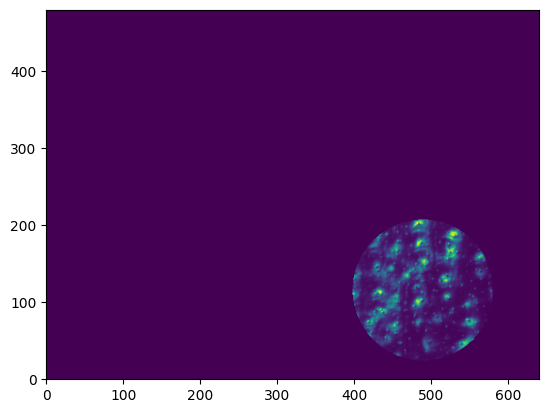

In [16]:
x_d = np.arange(nx) -200 - 289
y_d = np.arange(ny) -115 - 0 

xx_d, yy_d = np.meshgrid(x_d,y_d, indexing='ij')
mask_d = np.sqrt(xx_d**2 + yy_d**2) < r

new_d = phase[mask_d]

new_d.shape

just_new_d= np.zeros([nx, ny])
just_new_d[mask_d] = new_d
pli(just_new_d)

1.3999999999999773 264.20000000000005


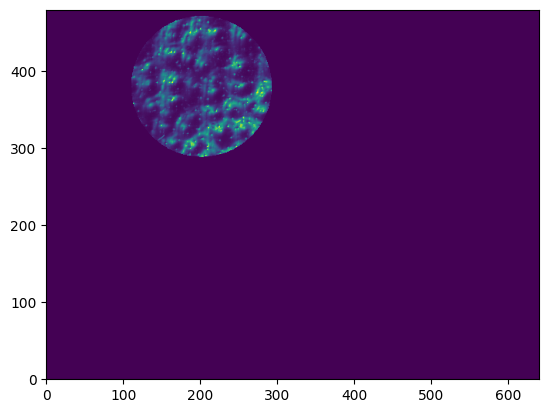

In [20]:
shift_pix_x_a = 211.2 - 209.8 
shift_pix_y_a = 373.6 - 109.4
print(shift_pix_x_a, shift_pix_y_a)

x_a = np.arange(nx) -200 - shift_pix_x_a
y_a = np.arange(ny) -115 - shift_pix_y_a

xx_a, yy_a = np.meshgrid(x_a,y_a, indexing='ij')
mask_a = np.sqrt(xx_a**2 + yy_a**2) < r
new_a = phase[mask_a]

just_new_a = np.zeros([nx, ny])
just_new_a[mask_a] = new_a
pli(just_new_a)

